In [1]:
import os
import numpy as np
import time
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.patches  as mpatches
import matplotlib
import seaborn as sns
sns.set()

/usr/local/manual/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [2]:
from lsst.sims.catalogs.generation.db import CatalogDBObject
from lsst.sims.catalogs.generation.db import CatalogDBObject

In [3]:
import lsst.sims.catUtils.baseCatalogModels as bcm
from lsst.sims.catalogs.measures.instance import InstanceCatalog
from lsst.sims.utils import ObservationMetaData

Duplicate object type id 25 specified: 
Output object ids may not be unique.
This may not be a problem if you do not want globally unique id values
Duplicate object type id 40 specified: 
Output object ids may not be unique.
This may not be a problem if you do not want globally unique id values
Duplicate object type id 40 specified: 
Output object ids may not be unique.
This may not be a problem if you do not want globally unique id values
Duplicate object type id 40 specified: 
Output object ids may not be unique.
This may not be a problem if you do not want globally unique id values
Duplicate object type id 40 specified: 
Output object ids may not be unique.
This may not be a problem if you do not want globally unique id values


In [4]:
from lsst.sims.catUtils.baseCatalogModels import GalaxyTileObj, GalaxyDiskObj
from lsst.sims.catUtils.baseCatalogModels import SNObj
from lsst.sims.catUtils.mixins import FrozenSNCat

In [7]:
s  = SNObj(table='TwinkSN')

In [20]:
sk  = SNObj(table='TwinkSNKraken')

## ObsMetaData

In [21]:
from lsst.sims.catUtils.utils import ObservationMetaDataGenerator

In [22]:
degConv = np.array([1., 1./60., 1./3600.])
raConv = degConv / 24.0 * 360.
centralRA = np.dot(np.array([3., 32., 30]), raConv) #03h 32m 30s
centralDec = np.dot(np.array([-28, 6., 0.]), degConv)
patchRadius = 0.4 * np.sqrt(2) #np.dot(np.array([0.0, 10.0, 0.]), degConv)

In [23]:
opsimPath = os.path.join('/Users/rbiswas/data/LSST/OpSimData')
opsimDB = os.path.join(opsimPath,'enigma_1189_sqlite.db')

In [24]:
generator = ObservationMetaDataGenerator(driver='sqlite', database=opsimDB) #database = opsimPath, driver='sqlite')
obsMetaDataResults = generator.getObservationMetaData(limit=1000,
                                                      fieldRA=(centralRA - 2.0, centralRA + 2.0), 
                                                      fieldDec=(centralDec - 2.0, centralDec + 2.0),
                                                      expMJD=(49500., 49690.),
                                                      boundLength=0.05,
                                                      boundType='circle')

In [25]:
_ = [(obsMetaDataResults.index(x), x.mjd.TAI) for x in obsMetaDataResults if x.bandpass == 'r']

In [26]:
dir(obsMetaDataResults[0])

['__class__',
 '__delattr__',
 '__dict__',
 '__doc__',
 '__format__',
 '__getattribute__',
 '__hash__',
 '__init__',
 '__module__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__slotnames__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_assignDictKeyedToBandpass',
 '_assignPhoSimMetaData',
 '_bandpass',
 '_boundLength',
 '_boundType',
 '_bounds',
 '_buildBounds',
 '_epoch',
 '_m5',
 '_mjd',
 '_phoSimMetaData',
 '_pointingDec',
 '_pointingRA',
 '_rotSkyPos',
 '_seeing',
 '_site',
 '_skyBrightness',
 'bandpass',
 'boundLength',
 'boundType',
 'bounds',
 'm5',
 'mjd',
 'phoSimMetaData',
 'pointingDec',
 'pointingRA',
 'rotSkyPos',
 'seeing',
 'setBandpassM5andSeeing',
 'site',
 'skyBrightness',
 'summary']

In [14]:
TwinklesObsMetaDataSmall = obsMetaDataResults[35]
TwinklesObsMetaDataSmall2 = obsMetaDataResults[145]
TwinklesObsMetaDataSmall3 = obsMetaDataResults[390]

In [15]:
print (TwinklesObsMetaDataSmall.pointingRA, TwinklesObsMetaDataSmall2.pointingRA, TwinklesObsMetaDataSmall3.pointingRA)

(53.009138473031555, 53.009138473031555, 53.009138473031555)


In [16]:
class TSNCopy(InstanceCatalog):
    
    column_outputs = ['raJ2000', 'decJ2000', 'snid', 'Tgaltileid','Tt0', 'Tx0', 'Tx1', 'Tc', 'Tredshift', ]
    override_formats = {'raJ2000': '%8e', 'decJ2000': '%8e', 'x0':'%8e'}

In [17]:
Ttsmall = TSNCopy(db_obj=s, obs_metadata=TwinklesObsMetaDataSmall)
Ttsmall.write_catalog('TTwinklesSN.dat')

In [28]:
Ttksmall = TSNCopy(db_obj=sk, obs_metadata=TwinklesObsMetaDataSmall)
Ttksmall.write_catalog('TkTwinklesSN.dat')

In [34]:
TTSNdf = pd.read_csv('TTwinklesSN.dat', sep=',\s+')
TkTSNdf = pd.read_csv('TkTwinklesSN.dat', sep=',\s+')

/usr/local/manual/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators; you can avoid this warning by specifying engine='python'.
  if __name__ == '__main__':
/usr/local/manual/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators; you can avoid this warning by specifying engine='python'.
  from ipykernel import kernelapp as app


In [36]:
TkTSNdf.head()

,#raJ2000,decJ2000,snid,Tgaltileid,Tt0,Tx0,Tx1,Tc,Tredshift
0,0.924864,-0.479661,6000005211700,60000052117,2923.3827,0,0.9056,-0.0474,0.7080
1,0.924882,-0.479686,6001680414301,60016804143,2118.2059,0,0.1844,-0.0584,0.4991
2,0.924912,-0.479704,6000054602800,60000546028,1264.0727,0,-1.7449,-0.0353,0.8491
3,0.924884,-0.479688,6001680414302,60016804143,1259.0984,0,-0.7003,-0.0709,0.4991
4,0.924959,-0.479727,6000166844101,60001668441,91.5972,0,0.7687,-0.1199,0.8669


In [37]:
TTSNdf.head()

,#raJ2000,decJ2000,snid,Tgaltileid,Tt0,Tx0,Tx1,Tc,Tredshift
0,0.924869,-0.479665,6000005211701,60000052117,1458.2762,0,0.2415,-0.0370,0.7080
1,0.924917,-0.479692,6000035145300,60000351453,3497.6771,0,0.0199,0.0572,0.8491
2,0.924917,-0.479693,6000035145315,60000351453,11.8677,0,-0.3470,-0.0993,0.8491
3,0.924917,-0.479698,6000035145310,60000351453,3156.4636,0,-0.7167,-0.1043,0.8491
4,0.924915,-0.479698,6000035145308,60000351453,1377.2543,0,-0.6872,0.0519,0.8491


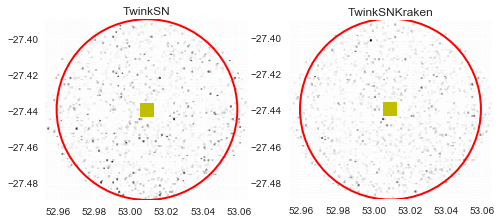

In [50]:
fig, ax = plt.subplots(1,2)
ax[0].hexbin(np.degrees(TTSNdf['#raJ2000']), np.degrees(TTSNdf.decJ2000))
ax[0].plot(TwinklesObsMetaDataSmall.pointingRA, TwinklesObsMetaDataSmall.pointingDec, 
         'ys', markersize=14)
ax[1].hexbin(np.degrees(TkTSNdf['#raJ2000']), np.degrees(TkTSNdf.decJ2000))
ax[1].plot(TwinklesObsMetaDataSmall.pointingRA, TwinklesObsMetaDataSmall.pointingDec, 
         'ys', markersize=14)
circ = mpatches.Circle((TwinklesObsMetaDataSmall.pointingRA, TwinklesObsMetaDataSmall.pointingDec), 
         0.05)
circ.set(edgecolor='r', fill=False, lw=2)
#circ.set(face)
ax[0].add_artist(circ)
ax[0].set_aspect('equal')
circ1 = mpatches.Circle((TwinklesObsMetaDataSmall.pointingRA, TwinklesObsMetaDataSmall.pointingDec), 
         0.05)
circ1.set(edgecolor='r', fill=False, lw=2)
ax[1].add_artist(circ1)
ax[1].set_aspect('equal')
y_formatter = matplotlib.ticker.ScalarFormatter(useOffset=False)
ax[0].yaxis.set_major_formatter(y_formatter)
ax[1].yaxis.set_major_formatter(y_formatter)
ax[0].set_title('TwinkSN')
ax[1].set_title('TwinkSNKraken')
#sns.despine()

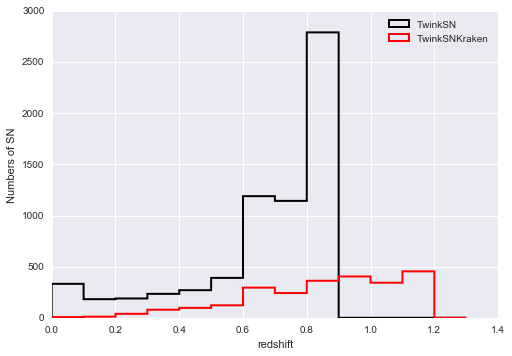

In [60]:
fig, ax = plt.subplots()
ax.hist(TTSNdf.Tredshift, bins=np.arange(0., 1.4, 0.1), histtype='step', lw=2., alpha=1, color='k', label='TwinkSN')
ax.hist(TkTSNdf.Tredshift, bins=np.arange(0., 1.4, 0.1), histtype='step', lw=2., alpha=1, color='r', 
        label='TwinkSNKraken')
ax.legend(loc='best')
ax.set_ylabel('Numbers of SN')
ax.set_xlabel('redshift')

##  SN Instance Catalogs

In [61]:
TwinklesObsMetaDataSmall.boundLength = 0.3

In [62]:
sncatalog = FrozenSNCat(db_obj=s, obs_metadata=TwinklesObsMetaDataSmall, 
                         column_outputs=['snra', 'galtileid', 'sndec', 'snid', 'x0', 't0', 'flux', 'flux_err', 'mag', 'mag_err',
                                         'TmagNorm', 'TsedFilepath', 'adu'])
sncatalog.surveyStartDate = 49500.
sncatalog.writeSedFile = False
sncatalog.prefix = '/Users/rbiswas/tmp/'

In [63]:
sncatalog.suppressDimSN = True

In [ ]:
start = time.time()
_ = sncatalog.write_catalog('newcat.dat', chunk_size=2000)
end = time.time()
print end -start

In [21]:
#NoCalcCat = FrozenSNCat(db_obj=s, obs_metadata=TwinklesObsMetaDataSmall, 
#                         column_outputs=['snra', 'galtileid', 'sndec', 'snid', 'x0', 't0'])
#NoCalcCat.surveyStartDate = 49500.
#NoCalcCat.writeSedFile = False
#NoCalcCat.prefix = '/Users/rbiswas/tmp/'

In [22]:
#start = time.time()
#_ = NoCalcCat.write_catalog('nocalculations.dat', chunk_size=2000)
#end = time.time()
#print end -start

In [ ]:
!wc -l newcat.dat
#!wc -l newcat2.dat
#!wc -l newcat3.dat

In [24]:
OnlyPhoSim = FrozenSNCat(db_obj=s, obs_metadata=TwinklesObsMetaDataSmall, 
                         column_outputs=['snra', 'galtileid', 'sndec', 'snid', 'x0', 't0',
                                         'TmagNorm', 'TsedFilepath'])
OnlyPhoSim.surveyStartDate = 49500.
OnlyPhoSim.writeSedFile = False
OnlyPhoSim.prefix = '/Users/rbiswas/tmp/'

In [25]:
start = time.time()
_ = OnlyPhoSim.write_catalog('onlyPhosimCalcs.dat', chunk_size=2000)
end = time.time()
print end -start

45.8671438694


In [26]:
OnlyPhoSim.writeSedFile = True
start = time.time()
_ = OnlyPhoSim.write_catalog('onlyPhosimCalcs.dat', chunk_size=2000)
end = time.time()
print end -start

76.6342840195


##  PhoSim Instance Catalogs

In [27]:
from lsst.sims.catUtils.exampleCatalogDefinitions.phoSimCatalogExamples import PhoSimCatalogSN, PhoSimCatalogSersic2D

In [28]:
pc = PhoSimCatalogSN(db_obj=s, obs_metadata=TwinklesObsMetaDataSmall, column_outputs=['EBV'])
pc.writeSedFile = True
pc.surveyStartDate = 49500
pc.suppressDimSN = True

In [29]:
start = time.time()
pc.write_catalog('SNOnlyPhoSimCatalog.dat')
end = time.time()
print end - start

91.4685590267


In [30]:
np.willstop()

AttributeError: 'module' object has no attribute 'willstop'

## Read in the SN instance Catalog

In [ ]:
sncatdf = pd.read_csv('newcat.dat', sep=',', float_precision='high')

In [ ]:
sncatdf.rename(columns={x:x.strip().strip('#') for x in sncatdf.columns}, inplace=True)

In [ ]:
sncatdf.head()

In [34]:
# Fix the types
sncatdf['snid'] = sncatdf.snid.astype(int)
#sncatdf.set_index('snid', inplace=True)
names = [x for x in sncatdf.columns]; 
for name in ['snid', 'galtileid', 'TsedFilepath']:
    names.remove(name)

In [35]:
sncatdf['DeltaT'] = sncatalog.mjdobs - sncatdf['t0']

In [36]:
sncatdf[names] = sncatdf[names].astype(np.float)

In [37]:
sncatdf['SNR'] = sncatdf.flux / sncatdf.flux_err
sncatdf.head()

,snid,snra,sndec,z,t0,c,x1,x0,galtileid,flux,flux_err,mag,mag_err,TmagNorm,TsedFilepath,adu,DeltaT,SNR
0,6001071595402,0.926196,-0.477528,0.8379,49637.2436,0.139800,-0.7083,0.000002,60010715954,4.261660e-12,3.595842e-11,28.426100,2.437166,52.8344,/Users/rbiswas/tmp/specFile_6001071595402_496...,12.3444,-24.905304,0.118516
1,6000972657300,0.926198,-0.477526,0.6382,49661.5219,-0.017082,0.6245,0.000007,60009726573,0.000000e+00,NaN,inf,inf,50.0762,/Users/rbiswas/tmp/specFile_6000972657300_496...,0.0000,-49.183604,NaN
2,6000017682402,0.926169,-0.477429,0.0558,49587.5575,0.109306,-0.4824,0.001197,60000176824,3.177180e-08,7.785457e-11,18.744900,0.005662,19.6331,/Users/rbiswas/tmp/specFile_6000017682402_496...,92030.4454,24.780796,408.091651
3,6000017682405,0.926172,-0.477448,0.0558,49540.5410,-0.009753,-0.0698,0.001456,60000176824,0.000000e+00,NaN,inf,inf,20.4170,/Users/rbiswas/tmp/specFile_6000017682405_496...,0.0000,71.797296,NaN
4,6000288237307,0.926118,-0.477535,0.8125,49673.9199,-0.013907,-0.7681,0.000004,60002882373,0.000000e+00,NaN,inf,inf,52.0033,/Users/rbiswas/tmp/specFile_6000288237307_496...,0.0000,-61.581604,NaN


####  Some Sanity Checks

In [38]:
sncatdf['logaduByflux'] = np.log10(sncatdf.adu/sncatdf.flux)

In [39]:
brightobjects = sncatdf.query('SNR > 1')

axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.


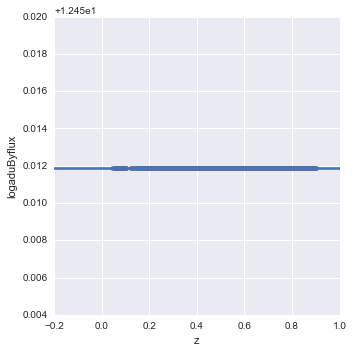

In [40]:
sns.lmplot("z", 'logaduByflux', data=brightobjects)

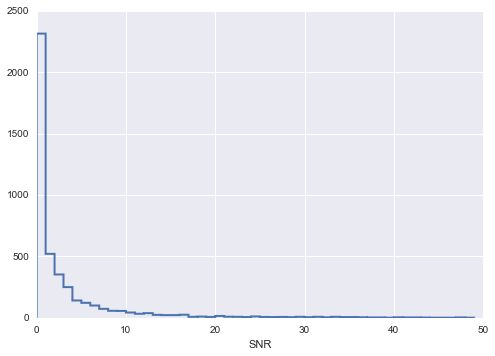

In [70]:
fig, ax = plt.subplots()
sncatdf.SNR.hist(bins=np.arange(0., 50., 1.), histtype='step', lw=2., alpha=1., ax=ax)
ax.set_xlabel('SNR')

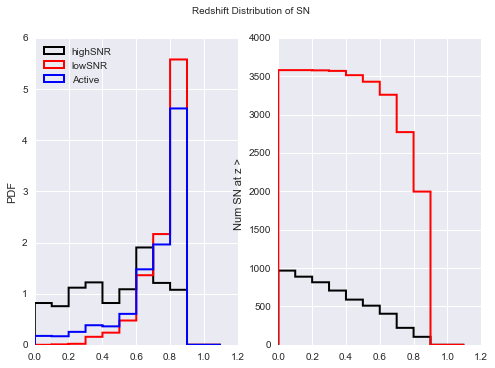

In [42]:
fig, ax = plt.subplots(nrows=1, ncols=2);
_ = ax[0].hist(sncatdf.query('SNR > 5.').z, bins=np.arange(0., 1.2, 0.1), histtype='step', lw=2, color='k', normed=True,
               label='highSNR')
_ = ax[0].hist(sncatdf.query('SNR < 5. and SNR > 0.').z, bins=np.arange(0., 1.2, 0.1), histtype='step', lw=2, color='r', 
             normed=True, label='lowSNR')
_ = ax[0].hist(sncatdf.query('SNR > 0.').z, bins=np.arange(0., 1.2, 0.1), histtype='step', lw=2, color='b', 
             normed=True, label='Active')
ax[0].grid(True)
_ = ax[1].hist(sncatdf.query('SNR > 5.').z, bins=np.arange(0., 1.2, 0.1), histtype='step', lw=2, color='k', normed=False, 
               cumulative=-1)
_ = ax[1].hist(sncatdf.query('SNR < 5. and SNR > 0.').z, bins=np.arange(0., 1.2, 0.1), histtype='step', lw=2, color='r', 
               normed=False, cumulative=-1)
_ = ax[1].grid(True)
_ = ax[0].legend(loc='upper left')
_ = ax[0].set_ylabel('PDF')
_ = ax[1].set_ylabel('Num SN at z > ')
_ = fig.suptitle('Redshift Distribution of SN')

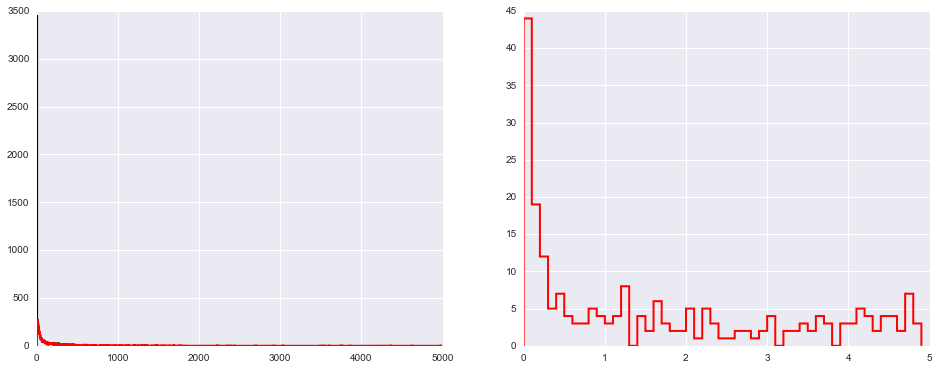

In [43]:
fig, ax = plt.subplots(1, 2, figsize=(16,6))
_ = ax[0].hist(sncatdf.adu, bins=np.arange(0, 500, 5), histtype='step', alpha=1, lw=2., color='k')
_ = ax[0].hist(sncatdf.adu.replace({0:np.nan}).dropna(), bins=np.arange(0, 5000, 5), histtype='step', 
               alpha=1, lw=2., color='r')
_ = ax[1].hist(sncatdf.adu.replace({0:np.nan}).dropna(), bins=np.arange(0, 5, 0.1), histtype='step', 
               alpha=1, lw=2., color='r')

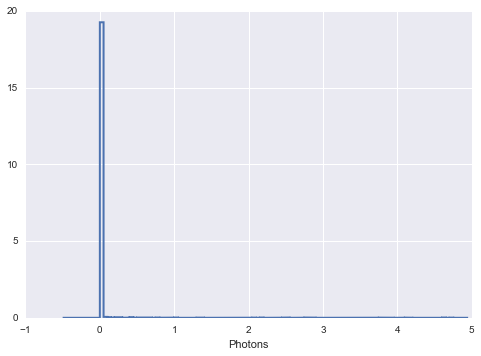

In [44]:
fig, ax = plt.subplots()
sncatdf.adu.apply(lambda x: x* 2.3).hist(bins=np.arange(-0.5, 5., 0.05), histtype='step', lw=2., alpha=1., ax=ax, 
                                         normed=1)
ax.set_xlabel('Photons')

### Read in the phosim Outputs

In [45]:
phosimOuta = pd.read_csv('/Users/rbiswas/soft/phosim_release/testout/centroid_lsst_e_203482_R22_S11_E000.txt', 
                         float_precision='high', sep='\s+')
phosimOutb = pd.read_csv('/Users/rbiswas/soft/phosim_release/testout/centroid_lsst_e_203482_R22_S11_E001.txt', 
                         float_precision='high', sep='\s+')

In [46]:
phosimOuta.SourceID = phosimOuta.SourceID.astype('int')
phosimOutb.SourceID = phosimOutb.SourceID.astype('int')
phosimOuta.set_index('SourceID', inplace=True)
phosimOutb.set_index('SourceID', inplace=True)
phosimOuta.Photons += phosimOutb.Photons

In [47]:
phosimOuta.head()

,Photons,AvgX,AvgY
SourceID,,,
6144281204838442,10,1450.285714,2598.428571
6144620595713066,0,NaN,NaN
6144018893831210,0,NaN,NaN
6144093910125610,14,1533.250000,2602.875000
6144796137881642,0,NaN,NaN


Set the same index for sncatdf

In [48]:
sncatdf['SourceID'] = np.left_shift(sncatdf.snid, 10) + 42
sncatdf.set_index('SourceID', inplace=True)

In [49]:
sncatdf['Photons'] = phosimOuta.Photons

In [50]:
sncatdf.head()

,snid,snra,sndec,z,t0,c,x1,x0,galtileid,flux,flux_err,mag,mag_err,TmagNorm,TsedFilepath,adu,DeltaT,SNR,logaduByflux,Photons
SourceID,,,,,,,,,,,,,,,,,,,,
6145097313691690,6001071595402,0.926196,-0.477528,0.8379,49637.2436,0.139800,-0.7083,0.000002,60010715954,4.261660e-12,3.595842e-11,28.426100,2.437166,52.8344,/Users/rbiswas/tmp/specFile_6001071595402_496...,12.3444,-24.905304,0.118516,12.461891,NaN
6144996001075242,6000972657300,0.926198,-0.477526,0.6382,49661.5219,-0.017082,0.6245,0.000007,60009726573,0.000000e+00,NaN,inf,inf,50.0762,/Users/rbiswas/tmp/specFile_6000972657300_496...,0.0000,-49.183604,NaN,NaN,NaN
6144018106779690,6000017682402,0.926169,-0.477429,0.0558,49587.5575,0.109306,-0.4824,0.001197,60000176824,3.177180e-08,7.785457e-11,18.744900,0.005662,19.6331,/Users/rbiswas/tmp/specFile_6000017682402_496...,92030.4454,24.780796,408.091651,12.461890,NaN
6144018106782762,6000017682405,0.926172,-0.477448,0.0558,49540.5410,-0.009753,-0.0698,0.001456,60000176824,0.000000e+00,NaN,inf,inf,20.4170,/Users/rbiswas/tmp/specFile_6000017682405_496...,0.0000,71.797296,NaN,NaN,NaN
6144295155002410,6000288237307,0.926118,-0.477535,0.8125,49673.9199,-0.013907,-0.7681,0.000004,60002882373,0.000000e+00,NaN,inf,inf,52.0033,/Users/rbiswas/tmp/specFile_6000288237307_496...,0.0000,-61.581604,NaN,NaN,NaN


In [51]:
sncatdf['ratio'] = sncatdf.adu / sncatdf['Photons']

In [52]:
sncatdf.head()

,snid,snra,sndec,z,t0,c,x1,x0,galtileid,flux,...,mag,mag_err,TmagNorm,TsedFilepath,adu,DeltaT,SNR,logaduByflux,Photons,ratio
SourceID,,,,,,,,,,,,,,,,,,,,,
6145097313691690,6001071595402,0.926196,-0.477528,0.8379,49637.2436,0.139800,-0.7083,0.000002,60010715954,4.261660e-12,...,28.426100,2.437166,52.8344,/Users/rbiswas/tmp/specFile_6001071595402_496...,12.3444,-24.905304,0.118516,12.461891,NaN,NaN
6144996001075242,6000972657300,0.926198,-0.477526,0.6382,49661.5219,-0.017082,0.6245,0.000007,60009726573,0.000000e+00,...,inf,inf,50.0762,/Users/rbiswas/tmp/specFile_6000972657300_496...,0.0000,-49.183604,NaN,NaN,NaN,NaN
6144018106779690,6000017682402,0.926169,-0.477429,0.0558,49587.5575,0.109306,-0.4824,0.001197,60000176824,3.177180e-08,...,18.744900,0.005662,19.6331,/Users/rbiswas/tmp/specFile_6000017682402_496...,92030.4454,24.780796,408.091651,12.461890,NaN,NaN
6144018106782762,6000017682405,0.926172,-0.477448,0.0558,49540.5410,-0.009753,-0.0698,0.001456,60000176824,0.000000e+00,...,inf,inf,20.4170,/Users/rbiswas/tmp/specFile_6000017682405_496...,0.0000,71.797296,NaN,NaN,NaN,NaN
6144295155002410,6000288237307,0.926118,-0.477535,0.8125,49673.9199,-0.013907,-0.7681,0.000004,60002882373,0.000000e+00,...,inf,inf,52.0033,/Users/rbiswas/tmp/specFile_6000288237307_496...,0.0000,-61.581604,NaN,NaN,NaN,NaN


In [53]:
sncatdf.query('ratio == 0.').SNR.max()

nan

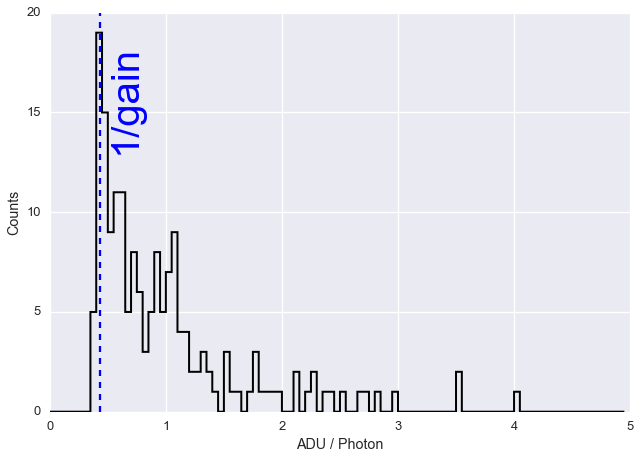

In [54]:
sns.set_context('talk')
#Talk Fig
fig, ax = plt.subplots()
_ = ax.hist(sncatdf.query('SNR>0.').ratio, bins=np.arange(0, 5., 0.05), histtype='step', lw=2., color='k', 
            label='adu/Photons')
_ = ax.axvline(1/2.3, **{'color':'b', 'ls':'dashed', 'label':'invgain'})
#_ = ax.legend(loc='best')
_ = ax.text(0.5, 17, '1/gain', fontdict={'size':40, 'color': 'b', 'rotation': 90})
_ = ax.set_xlabel('ADU / Photon')
_ = ax.set_ylabel('Counts')
fig.savefig('adu_photons.pdf')

In [55]:
def makeaComparisonPlot(sncatdf):
    fig, ax = plt.subplots(2, 2, sharey=True, **{'figsize':(16,12)})
    _ = ax[0,0].hist(sncatdf.ratio, bins=np.arange(0, 5., 0.05), histtype='step', lw=2., color='k', label='adu/Photons')
    ax[0,0].axvline(1/2.3, **{'color':'b', 'ls':'dashed', 'label':'invgain'})
    ax[0,0].legend(loc='best')
    ax[0,1].hist(sncatdf.query('adu < 1.0e-10 and Photons > 0').Photons, histtype='step', normed=False, 
                 cumulative=True, lw=2., color='k', bins=np.arange(0., 200., 10))
    ax[0,0].set_xlabel('Adu/Num Photons')
    _ = ax[1,0].hist(sncatdf.Photons/sncatdf.adu, bins=np.arange(0, 5., 0.05), histtype='step', lw=2., color='k',
                     label='Photons/adu')
    ax[1,0].axvline(2.3, **{'color':'b', 'ls':'dashed', 'label':'gain'})
    ax[1,0].legend(loc='best')
    ax[1,0].set_xlabel('Num Photons/Adu')
    
    _ = ax[1,1].hist(sncatdf.query('adu > 1.0e-10 and Photons == 0').adu, histtype='step', normed=False, 
                     cumulative=True, lw=2., color='k', bins=np.arange(0., 200., 10))

    return fig

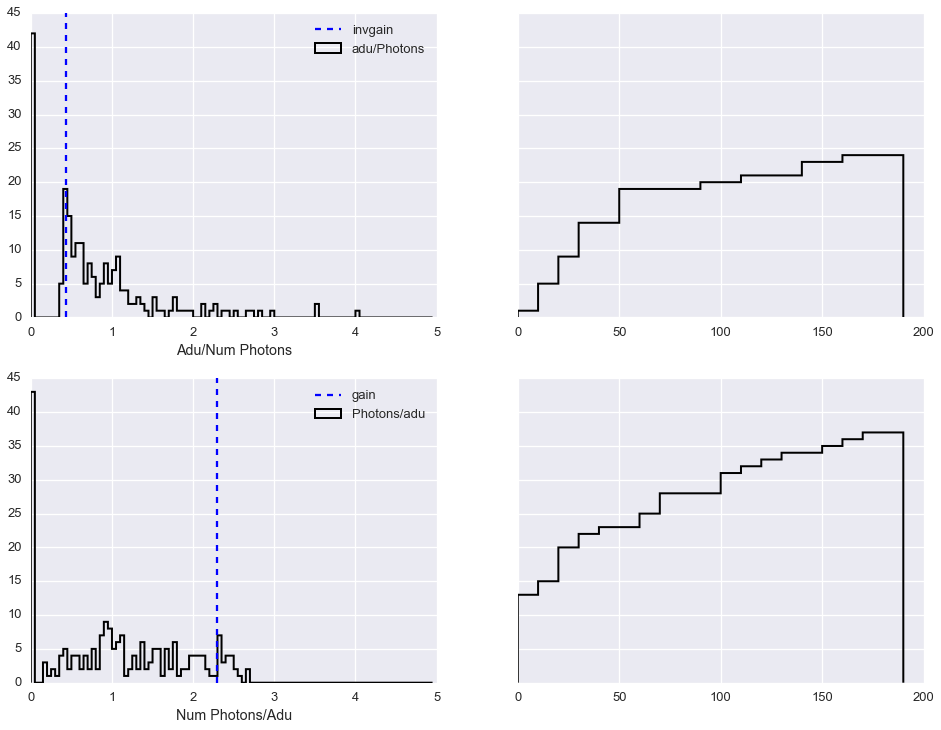

In [56]:
_ = makeaComparisonPlot(sncatdf)

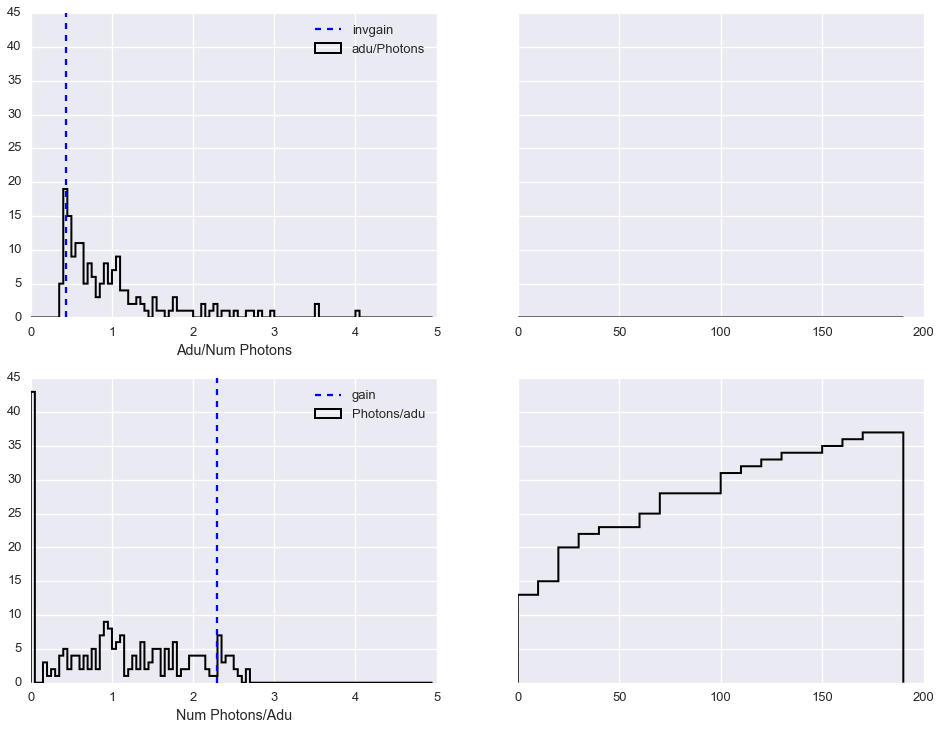

In [57]:
_ = makeaComparisonPlot(sncatdf.query('SNR > 0.'))

axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.


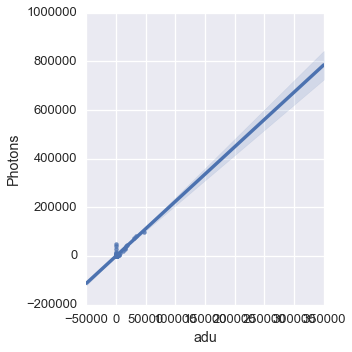

In [58]:
sns.lmplot("adu", 'Photons', data=sncatdf)

In [59]:
sncatdf['estimatedAdu'] = sncatdf.Photons / 2.3

In [60]:
sncatdf['residAdu'] = sncatdf.estimatedAdu - sncatdf.adu

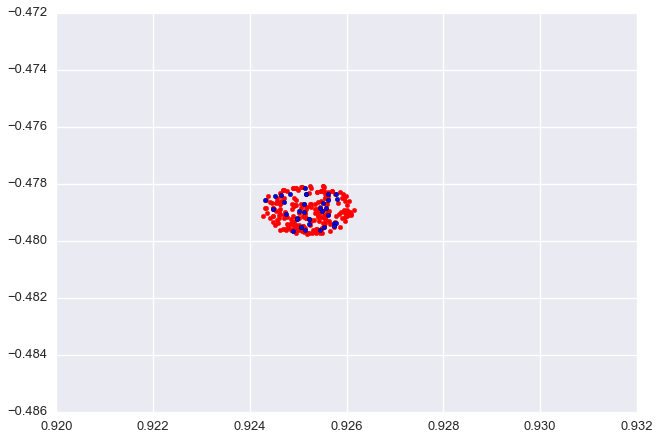

In [67]:
aduthresh = 3.
plt.scatter(sncatdf.query('Photons > 0')['snra'], sncatdf.query('Photons> 0')['sndec'], color='r')
plt.scatter(sncatdf.query('Photons==0 and adu > @aduthresh')['snra'], sncatdf.query('Photons==0 and adu > @aduthresh')['sndec'])

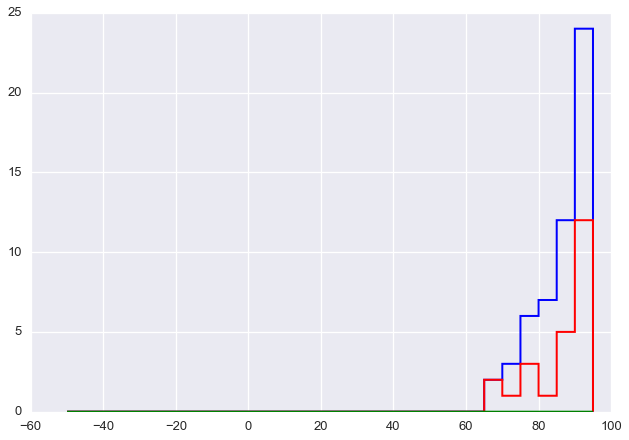

In [62]:
sncatdf.query('adu < 0.0001 and Photons >0').DeltaT.hist(**{'color':'b', 'lw':2, 'histtype':'step', 
                                                                 'bins':np.arange(-50, 100, 5), 'cumulative':1 })
sncatdf.query('adu < 0.0001 and Photons > 3').DeltaT.hist(**{'color':'r', 'lw':2, 'histtype':'step',
                                                                  'bins':np.arange(-50, 100, 5) })
sncatdf.dropna().query('adu <0.0001 and Photons > 30').DeltaT.hist(**{'color':'g', 'lw':2, 'histtype':'step',
                                                                   'bins':np.arange(-50, 100, 5) })

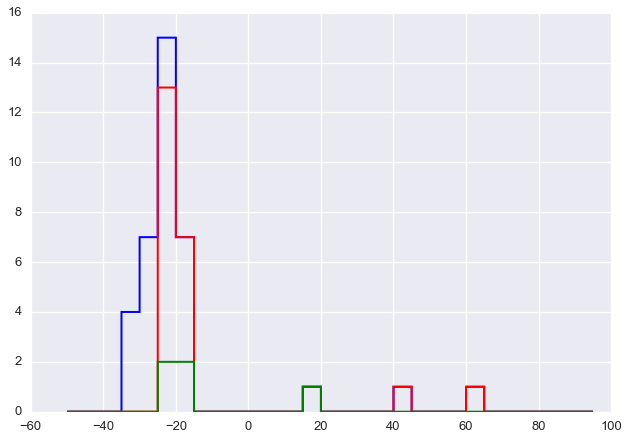

In [63]:
sncatdf.dropna().query('Photons ==0 and adu > 3').DeltaT.hist(**{'color':'b', 'lw':2, 'histtype':'step', 
                                                                 'bins':np.arange(-50, 100, 5) })
sncatdf.dropna().query('Photons ==0 and adu > 30').DeltaT.hist(**{'color':'r', 'lw':2, 'histtype':'step',
                                                                  'bins':np.arange(-50, 100, 5) })
sncatdf.dropna().query('Photons ==0 and adu > 300').DeltaT.hist(**{'color':'g', 'lw':2, 'histtype':'step',
                                                                   'bins':np.arange(-50, 100, 5) })

axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.


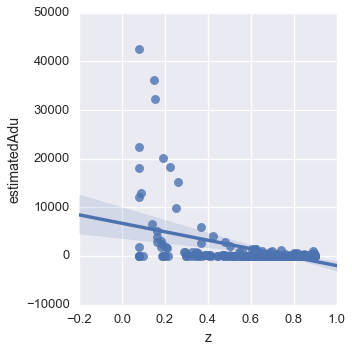

In [64]:
sns.lmplot("z", 'estimatedAdu', data=sncatdf, scatter_kws={"s": 80})

axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.


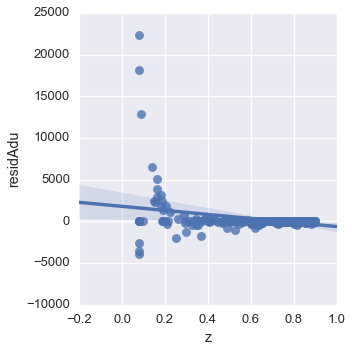

In [65]:
sns.lmplot("z", 'residAdu', data=sncatdf, scatter_kws={"s": 80})

# Scratch

In [66]:
phosimOuta.SourceID.min()

AttributeError: 'DataFrame' object has no attribute 'SourceID'

In [ ]:
phosimOutb = pd.read_csv('/Users/rbiswas/soft/phosim_release/output/centroid_lsst_e_203482_R22_S11_E001.txt', sep='\s+')

In [ ]:
phosimOuta.Photons = phosimOuta.Photons + phosimOutb.Photons

In [ ]:
phosimOuta['SourceID'] = phosimOuta.SourceID.astype(int)

In [ ]:
phosimOuta['snid'] = np.right_shift(phosimOuta['SourceID'], 10)

In [ ]:
phosimOuta.set_index('snid', inplace=True)

In [ ]:
sncatdf.adu.min()

In [ ]:
sncatdf['ratio'] = sncatdf.adu / phosimOuta.Photons

In [ ]:
sncatdf['Photons'] = phosimOuta.Photons

In [ ]:
sncatdf.query('ratio == 0.')

In [ ]:
fig, ax = plt.subplots()
sns.distplot(sncatdf.ratio.replace([-np.inf, np.inf],np.nan).dropna(), bins=np.arange(0.0, 5., 0.05), 
             rug_kws=False,kde=False, norm_hist=False).set_xlim(0,)
sns.distributions()
#ax.hist(df.ratio.replace([-np.inf, np.inf],np.nan).dropna() ,bins=np.arange(0., 5, 0.05))
ax.axvline(1./2.3, color='k', **{'label':'1/gain', 'linestyle':'dashed'})
ax.set_xlabel('adu/Photons')
ax.legend(loc='best')

In [ ]:
rv = poisson(mu=1)

In [ ]:
x = np.arange(0, 10)

In [ ]:
plt.plot(x, rv.pmf(x), 'bo')

In [ ]:
plt.hist(sncatdf.Photons / sncatdf.adu / 2.3, np.arange(-0.5,5.5), histtype='step')
plt.plot()

In [ ]:
plt.plot(poisson.pmf)

In [ ]:
df.query('ratio > 1000.')[['adu', 'Photons', 'flux', 'DeltaT', 'mag', 'mag_err', 'flux_err']]

In [ ]:
x = df.query('ratio ==0.').Photons.copy(deep=True)

In [ ]:
x.sort(ascending=False); x

In [ ]:
fig.savefig('invGain.png')

In [ ]:
import seaborn as sns
sns.set()

In [ ]:
print len(df.query('ratio > 10000')), df.query('ratio > 10000').ratio.unique()
print len(df.query('ratio < -10000')), df.query('ratio < -10000').ratio.unique()

In [ ]:
df.query('ratio >500.').adu 

In [ ]:
_df = df.query('ratio == 0.')
_dff = df.query('ratio < 0.')
_ = plt.hist(_df.DeltaT / (_df.z + 1.), bins=np.arange(-30, 70., 1.), histtype='step', color='b', alpha=1., lw=2.)
_ = plt.hist(_dff.DeltaT / (_dff.z + 1.), bins=np.arange(-30, 70., 1.), histtype='step', color='r', alpha=1., lw=2.)
plt.axvline(-20., color='k')
plt.axvline(50., color='k')

In [ ]:
_df = df[['z', 'ratio']].replace([-np.inf, np.inf], [-20., 200.]).dropna()
#sns.jointplot(_df.z, _df.ratio, kind='kde')
plt.plot(_df.z, _df.ratio, 'o')

In [ ]:
adus = df.adu.dropna().sum()
photons = phosimOuta.replace([np.inf],np.nan).Photons.dropna().sum()

In [ ]:
photons / adus

In [ ]:
active = df.query('SNR > 0.').replace([np.inf],np.nan).dropna().ratio
bright = df.query('SNR > 5.').replace([np.inf],np.nan).dropna().ratio

In [ ]:
s = 0.05
plt.hist(active, color='r', bins=np.arange(0., 25, s), histtype='step', label='SNR>0', lw=2)
plt.hist(bright, color='k', bins=np.arange(0., 25, s), histtype='step', label='SNR>5', lw=2)
plt.legend(loc='best')
plt.axvline(1./2.3)
plt.xlim(0, 5)

In [ ]:
import lsst.afw.image as afwi

In [ ]:
img0 = afwi.ImageF('/Users/rbiswas/soft/phosim_release/output/lsst_e_203482_f2_R22_S11_E000.fits.gz')
img1 = afwi.ImageF('/Users/rbiswas/soft/phosim_release/output/lsst_e_203482_f2_R22_S11_E001.fits.gz')

In [ ]:
arr0 = img0.getArray()
arr1 = img1.getArray()

In [ ]:
arr = arr0 + arr1
electrons = arr.sum()

In [ ]:
adus  = df.adu.dropna().sum()

In [ ]:
2.3 / np.sqrt(2)

In [ ]:
electrons / adus

In [ ]:
x.replace([-np.inf, np.inf], np.nan, inplace=True)

In [ ]:
x.dropna().hist()

In [ ]:
df.set_index('snid', inplace=True)

In [ ]:
x.dropna()

In [ ]:
df.index.size

In [ ]:
phosimOuta.index.dtype

In [ ]:
6145532174336041 in df.index.values

In [ ]:
df.iat[6145532174336041]

In [ ]:
phosimOuta['snid']  = phosimOuta.index.values

In [ ]:
phosimOuta['snid'] = np.right_shift(phosimOuta['snid'], 10)

In [ ]:
phosimOuta.set_index('snid', inplace=True)

In [ ]:
phosimOuta['adu']/ phosimOuta['Photons']

In [ ]:
phosimOuta.head()

In [ ]:
df.index.min()

In [ ]:
phosimOuta.index.min()

In [ ]:
np.left_shift(6000000189404,10) < phosimOuta.index.min()

In [ ]:
np.right_shift(np.left_shift(6000000189404,10),10)

In [ ]:
id(None)

In [ ]:
x  = None

In [ ]:
id(x)

In [ ]:
y = None

In [ ]:
xx =3

In [ ]:
yy  = 3

In [ ]:
 == y

In [ ]:
x is y

In [ ]:
id(xx)

In [ ]:
id(yy)

# Scratch

In [ ]:
names = s.get_column_names()

for key in names:
    if 'snra' in names[key]:
        print key

print names['TwinkSN']

In [ ]:
class SNCopy(InstanceCatalog):
    
    column_outputs = ['raJ2000', 'decJ2000', 'snid', 'galtileid','t0', 'x0', 'x1', 'c', 'redshift', ]
    override_formats = {'raJ2000': '%8e', 'decJ2000': '%8e', 'x0':'%8e'}
                        #'x0':'%8e', 'x1':'%8e', 'c':'%8e', 't0':'%8e'}
        
